In [50]:
import random
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as sps
import scipy
import math

### Сгенерируем выборку с нормальным распределением

ShapiroResult(statistic=0.99789959192276, pvalue=0.2431126832962036)


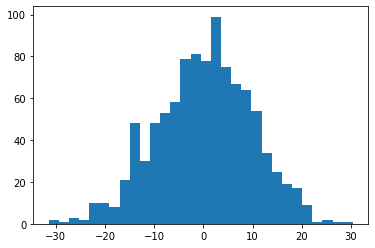

In [51]:
# выборка с нормальным распределением
x = sps.norm(scale=10).rvs(size=1000)
plt.hist(x, bins=30)
print(scipy.stats.shapiro(x))

ShapiroResult(statistic=0.99789959192276, pvalue=0.2431126832962036)

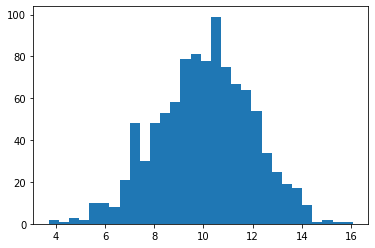

In [52]:
# подкорректируем данные для линейной регрссии
x = [10+x*0.2 for x in x]
plt.hist(x, bins=30)
scipy.stats.shapiro(x)

### Mean, median, dispersion

In [53]:
# метрики в функциях
def decor(func):
    def rounder(*args, **kwargs):
        rt = round(func(*args, **kwargs), 3)
        return rt
    return rounder

@decor
def my_mean(a):
    return sum(a)/len(a)

@decor
def my_median(a):
    a.sort()
    if len(a)%2 != 0: return a[int((len(a)-1)/2)]
    return sum(a[int(len(a)/2-1):int(len(a)/2+1)])/2

@decor
def my_dispersion(a):
    return sum([(x-my_mean(a))**2 for x in a])/len(a)

@decor
def my_sigma(a):
    return round(math.sqrt(my_dispersion(a)),3)

print(r'mean={}, median={}, dispersion={}, sigma={}'.format(my_mean(x), my_median(x), my_dispersion(x), my_sigma(x)))


mean=10.04, median=10.116, dispersion=3.741, sigma=1.934


In [54]:
# тоже самое в классе
class BaseMetrics():
    
    def __init__(self, sign_after=5):
        self.sign_after = sign_after

    # декоратор округления результата
    def decor_rounder(func):
        def rounder(self, *args, **kwargs):
            rt = round(func(*args, **kwargs), self.sign_after)
            return rt
        return rounder

    # расчет среднего
    @decor_rounder
    def my_mean(data):
        return sum(data)/len(data)

    # расчет медианы
    @decor_rounder
    def my_median(data):
        data.sort()
        if len(data)%2 != 0: return data[int((len(data)-1)/2)]
        return sum(data[int(len(data)/2-1):int(len(data)/2+1)])/2
    
    # расчет дисперсии/сигмы_квадрат
    @decor_rounder
    def my_dispersion(data):
        return sum([(x-my_mean(data))**2 for x in data])/len(data)

    # расчет сигмы
    @decor_rounder
    def my_sigma(data):
        from math import sqrt
        return sqrt(my_dispersion(data))


In [55]:
mtr = BaseMetrics(sign_after=5)

print(mtr.my_mean(x))
print(mtr.my_median(x))
print(mtr.my_dispersion(x))
print(mtr.my_sigma(x))

10.04005
10.11635
3.74112
1.93417


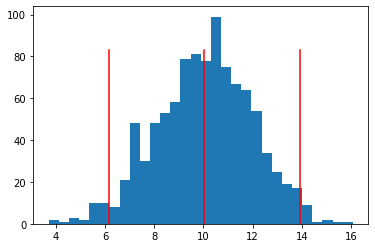

In [56]:
# Доверительный интервал mean+-2sigma
plt.hist(x, bins=30)
plt.axvline(x=mtr.my_mean(x), ymin=0.0, ymax=0.8, color='red')
plt.axvline(x=mtr.my_mean(x)+2*mtr.my_sigma(x), ymin=0.0, ymax=0.8, color='red')
plt.axvline(x=mtr.my_mean(x)-2*mtr.my_sigma(x), ymin=0.0, ymax=0.8, color='red')


In [57]:
# посмотрим принадлежит ли 95% наблдений +-2sigma
conf_int = [mtr.my_mean(x)-2*mtr.my_sigma(x), mtr.my_mean(x)+2*mtr.my_sigma(x)]
print(len(x))
print(len([y for y in x if y<conf_int[1] and y>conf_int[0]]))

1000
952
